# ABCD Yields

In [38]:
import uproot
import ROOT as r
import numpy as np

import matplotlib.pyplot as plt
import mplhep as hep
hep.style.use(hep.style.CMS)

In [39]:
def get_abcd(file, tree="Events"):
    with uproot.open(file) as f:
        df = f.get(tree).arrays(library="pd")
        
    BDT_CUT = 0.56
    DNN_CUT = 0.92

    a = sum(df[(df.VBSBDTscore > BDT_CUT) & (df.abcdnet_score > DNN_CUT)].weight)
    b = sum(df[(df.VBSBDTscore < BDT_CUT) & (df.abcdnet_score > DNN_CUT)].weight)
    c = sum(df[(df.VBSBDTscore > BDT_CUT) & (df.abcdnet_score < DNN_CUT)].weight)
    d = sum(df[(df.VBSBDTscore < BDT_CUT) & (df.abcdnet_score < DNN_CUT)].weight)

    if "data" in file:
        a = "BLINDED"

    print(f"Actual A: {a}")
    print(f"Region B: {b}")
    print(f"Region C: {c}")
    print(f"Region D: {d}")
    print(f"Predicted A: {b * c / d}")

    return b, c, d, a

# DATA

In [56]:
data = get_abcd("/home/users/aaarora/nvme/output/run2/ABCDNet_simpleDisco_VBSVVH1lep_30/output/data_MVA_abcdnet.root")

Actual A: BLINDED
Region B: 11
Region C: 75
Region D: 1016
Predicted A: 0.812007874015748


In [41]:
# df = r.RDataFrame("Events", "/home/users/aaarora/nvme/output/run2/ABCDNet_simpleDisco_VBSVVH1lep_30/output/data_MVA_abcdnet.root")
# hist = df.Histo2D(("h", "2D histogram", 5, 0, 1, 5, 0, 1), "VBSBDTscore", "abcdnet_score").GetValue()

# h = uproot.from_pyroot(hist).to_hist()

# fig, ax = plt.subplots()
# hep.hist2dplot(h, cbar=True, ax=ax, norm="log")
# hep.histplot(h.profile("yaxis"), ax=ax, histtype="errorbar", color="red")
# ax.scatter(h.profile("xaxis").to_numpy()[0], h.profile("xaxis").to_numpy()[1][:-1] + 0.1, color="red")


# hep.cms.label(data=True, label="Preliminary", lumi=138, year="Run2", ax=ax)

# ax.set_xlabel("VBS BDT Score")
# ax.set_ylabel("ABCDNet Score")

# SIG

In [57]:
data = get_abcd("/home/users/aaarora/nvme/output/run2/ABCDNet_simpleDisco_VBSVVH1lep_30/output/sig_MVA_abcdnet.root")

Actual A: 3.5731715913404365
Region B: 0.825209063257457
Region C: 1.1097248778857818
Region D: 0.4413277138997323
Predicted A: 2.0750000467037912


In [ ]:
data = get_abcd("/home/users/aaarora/nvme/output/run2/ABCDNet_simpleDisco_VBSVVH1lep_30/output/sig_MVA_abcdnet.root")

Text(72.70833333333333, 1, 'ABCDNet Score')

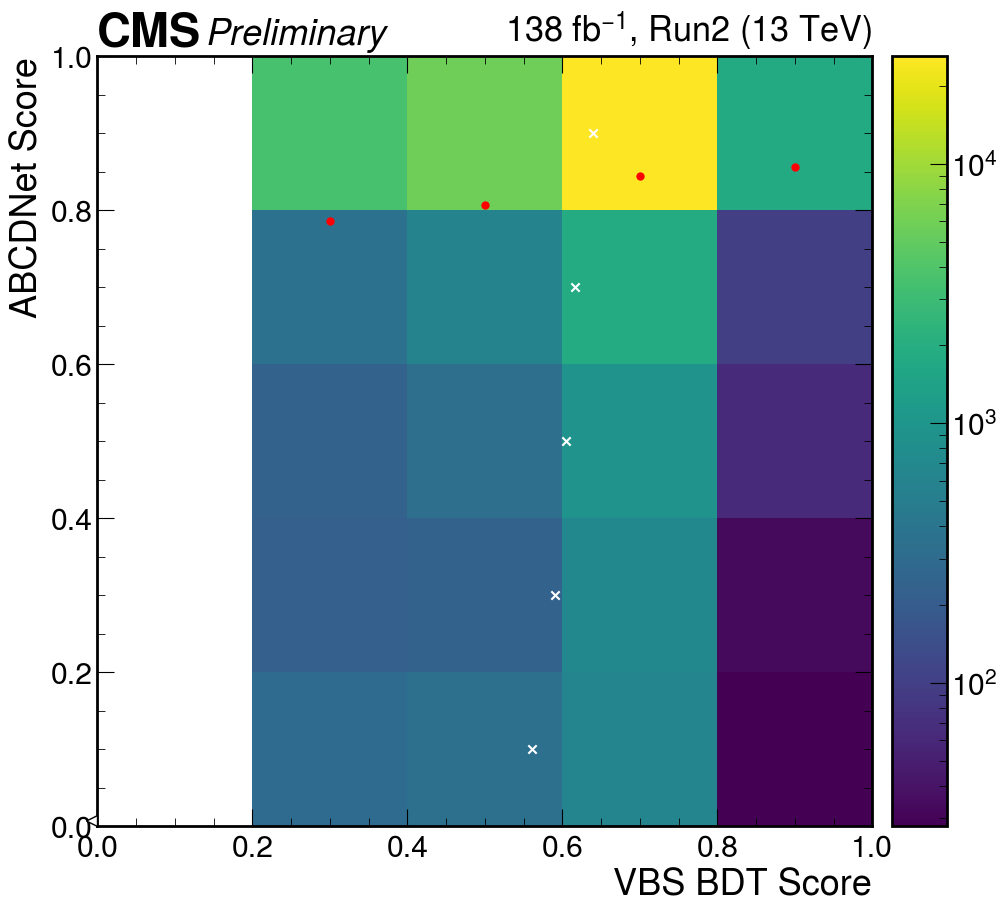

In [58]:
df = r.RDataFrame("Events", "/home/users/aaarora/nvme/output/run2/ABCDNet_simpleDisco_VBSVVH1lep_30/output/sig_MVA_abcdnet.root")
hist = df.Histo2D(("h", "2D histogram", 5, 0, 1, 5, 0, 1), "VBSBDTscore", "abcdnet_score").GetValue()

h = uproot.from_pyroot(hist).to_hist()

fig, ax = plt.subplots()
hep.hist2dplot(h, cbar=True, ax=ax, norm="log")
hep.histplot(h.profile("yaxis"), ax=ax, histtype="errorbar", color="red")
ax.scatter(h.profile("xaxis").to_numpy()[0], h.profile("xaxis").to_numpy()[1][:-1] + 0.1, color="white", marker="x")


hep.cms.label(data=True, label="Preliminary", lumi=138, year="Run2", ax=ax)

ax.set_xlabel("VBS BDT Score")
ax.set_ylabel("ABCDNet Score")

# BKG

In [64]:
data = get_abcd("/home/users/aaarora/nvme/output/run2/ABCDNet_simpleDisco_VBSVVH1lep_30/output/bkg_MVA_abcdnet.root")

Actual A: 2.652525600063849
Region B: 21.872874138021704
Region C: 66.47070472930942
Region D: 895.6513939119991
Predicted A: 1.623293804143446


Text(72.70833333333333, 1, 'ABCDNet Score')

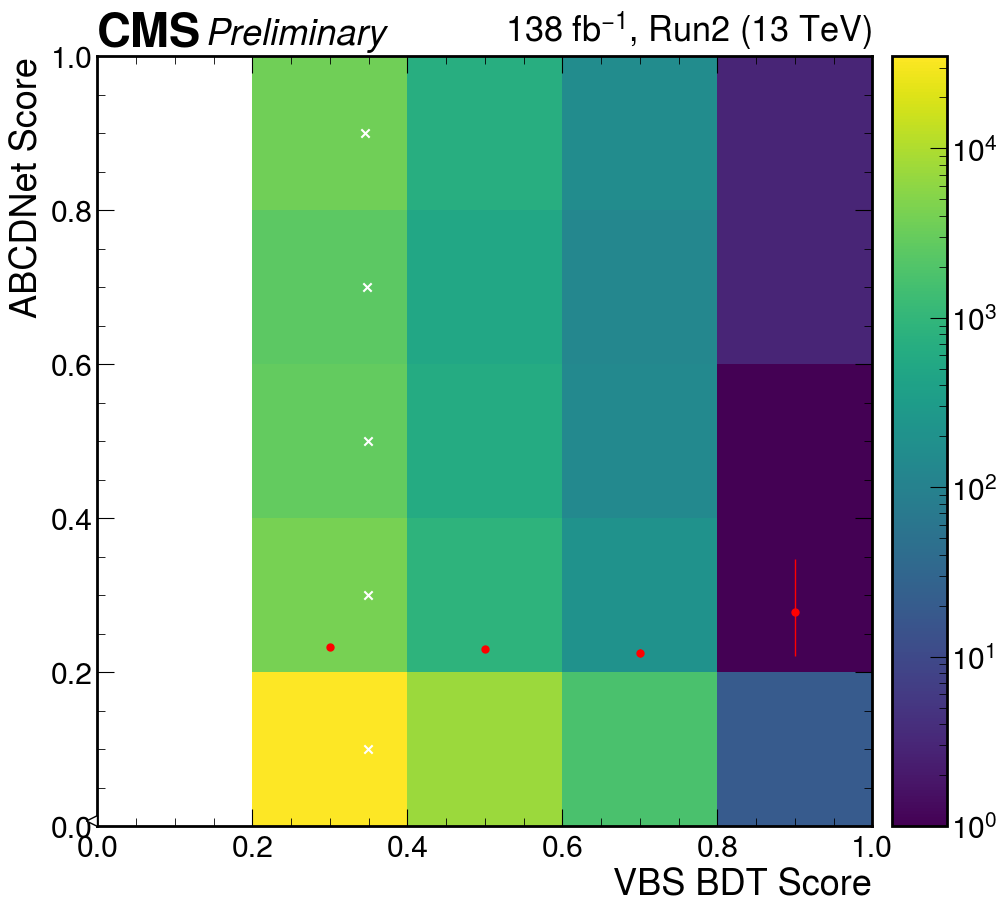

In [65]:
df = r.RDataFrame("Events", "/home/users/aaarora/nvme/output/run2/ABCDNet_simpleDisco_VBSVVH1lep_30/output/bkg_MVA_abcdnet.root")
hist = df.Histo2D(("h", "2D histogram", 5, 0, 1, 5, 0, 1), "VBSBDTscore", "abcdnet_score").GetValue()

h = uproot.from_pyroot(hist).to_hist()

fig, ax = plt.subplots()
hep.hist2dplot(h, cbar=True, ax=ax, norm="log")
hep.histplot(h.profile("yaxis"), ax=ax, histtype="errorbar", color="red")
ax.scatter(h.profile("xaxis").to_numpy()[0], h.profile("xaxis").to_numpy()[1][:-1] + 0.1, color="white", marker="x")

hep.cms.label(data=True, label="Preliminary", lumi=138, year="Run2", ax=ax)

ax.set_xlabel("VBS BDT Score")
ax.set_ylabel("ABCDNet Score")

Actual A: 0.0024386534484985584
Region B: 0.008779651356273769
Region C: 0.031385672380041606
Region D: 0.06585635855556193
Predicted A: 0.004184186115400155


/home/users/aaarora/.miniforge/envs/hep/lib/python3.11/site-packages/mplhep/error_estimation.py:49: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale


Text(72.70833333333333, 1, 'ABCDNet Score')

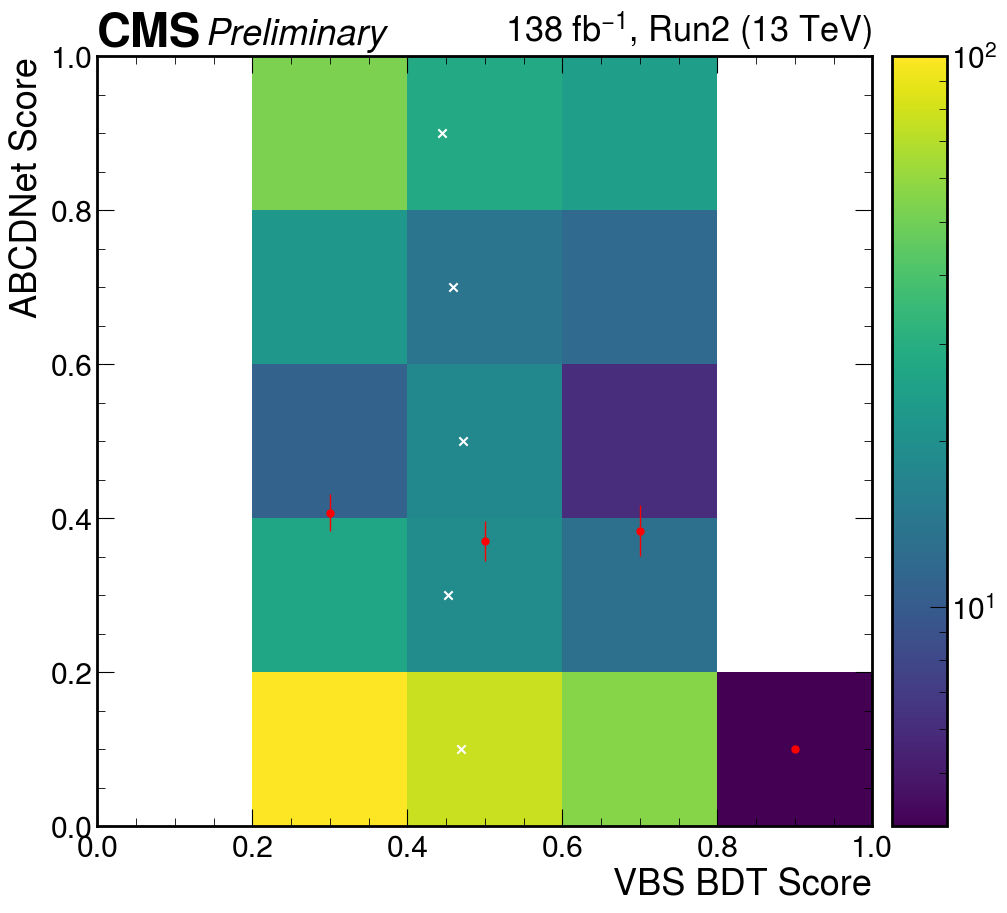

In [66]:
data = get_abcd("/home/users/aaarora/nvme/output/run2/ABCDNet_simpleDisco_VBSVVH1lep_30/output/sig_like_bkg_MVA_abcdnet.root")

df = r.RDataFrame("Events", "/home/users/aaarora/nvme/output/run2/ABCDNet_simpleDisco_VBSVVH1lep_30/output/sig_like_bkg_MVA_abcdnet.root")
hist = df.Histo2D(("h", "2D histogram", 5, 0, 1, 5, 0, 1), "VBSBDTscore", "abcdnet_score").GetValue()

h = uproot.from_pyroot(hist).to_hist()

fig, ax = plt.subplots()
hep.hist2dplot(h, cbar=True, ax=ax, norm="log")
hep.histplot(h.profile("yaxis"), ax=ax, histtype="errorbar", color="red")
ax.scatter(h.profile("xaxis").to_numpy()[0], h.profile("xaxis").to_numpy()[1][:-1] + 0.1, color="white", marker="x")

hep.cms.label(data=True, label="Preliminary", lumi=138, year="Run2", ax=ax)

ax.set_xlabel("VBS BDT Score")
ax.set_ylabel("ABCDNet Score")